# Cyberbullying Detection using Natural Language Processing
---

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

# Data Collection

Dataset file from: J. Wang, K. Fu, C.T. Lu, “SOSNet: A Graph Convolutional Network Approach to Fine-Grained Cyberbullying Detection,” Proceedings of the 2020 IEEE International Conference on Big Data (IEEE BigData 2020), December 10-13, 2020.

Link - https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data


With the escalating prevalence of social media use across all age groups, a significant portion of the population now heavily relies on this fundamental medium for day-to-day communication. The omnipresence of social media exposes individuals to the potential impact of cyberbullying at any given moment and in any location, exacerbated by the relative anonymity afforded by the internet, rendering personal attacks more challenging to thwart compared to traditional forms of bullying.

In response to the heightened risk of cyberbullying during the COVID-19 pandemic, UNICEF issued a warning on April 15th, 2020. This increased risk was attributed to widespread school closures, elevated screen time, and diminished face-to-face social interactions. The statistics surrounding cyberbullying are indeed concerning: 36.5% of middle and high school students have reported experiencing cyberbullying, while a staggering 87% have witnessed instances of cyberbullying. The repercussions extend from diminished academic performance to depression and even contemplation of suicidal thoughts.

Given these circumstances, the dataset in question encompasses over 47,000 tweets, each categorized based on the class of cyberbullying:

1. Age
2. Ethnicity
3. Gender
4. Religion
5. Other forms of cyberbullying
6. Not classified as cyberbullying

In [6]:
# Deleted some data from the original dataset becuase the GPU is not enough to handle 47000 data

df = pd.read_csv('/content/cyberbullying.csv', nrows = 20000)
df

,tweet_text,cyberbullying_type
0,I would back hand them both. Giving them a 1? ...,not_cyberbullying
1,Niggas wanna fight after school and shit,not_cyberbullying
2,#mkr say sassy one more time 😒,not_cyberbullying
3,Can't believe I'm still awake when I have to ...,not_cyberbullying
4,@OdiniaInvictus @SirajZarook @BilalIGhumman @I...,not_cyberbullying
...,...,...
19995,"you ignorant BITCH, Suck & Black Dick Your Whi...",ethnicity
19996,and your body goes oh shit nigger what the fuc...,ethnicity
19997,@FsN_Vigsta fuck that dumb nigger,ethnicity
19998,...did a white woman really just send me a vid...,ethnicity


In [7]:
df.shape

(20000, 2)

# Data processing


In [8]:
# Checking Null Values

df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [9]:
# Duplicate Values

df.nunique()

tweet_text            19732
cyberbullying_type        6
dtype: int64

In [10]:
df['tweet_text'].nunique()

19732

# EDA

In [11]:
df['cyberbullying_type'].value_counts()

religion               3446
gender                 3439
age                    3371
other_cyberbullying    3324
ethnicity              3212
not_cyberbullying      3208
Name: cyberbullying_type, dtype: int64

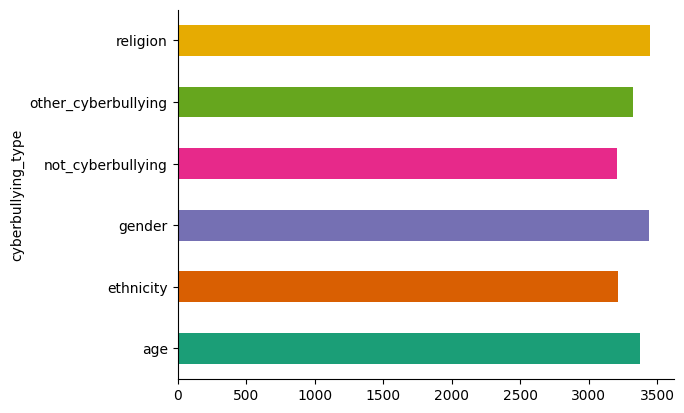

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('cyberbullying_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Relevant statistics

In [13]:
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
t = ' '.join(df['tweet_text'].values)

# Remove URLs
t = re.sub(r'#\S+', '', t)
t = re.sub(r'http\S+', '', t)
t = re.sub(r'@\S+', '', t)

words = t.split()

In [15]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [16]:
# frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 6727),
 ('school', 2828),
 ('like', 2222),
 ('high', 2000),
 ('bullied', 1836),
 ('dumb', 1787),
 ('RT', 1762),
 ('people', 1544),
 ('u', 1440),
 ('rape', 1329),
 ('fuck', 1227),
 ('one', 1173),
 ('gay', 1149),
 ('&amp;', 1119),
 ('bully', 1103),
 ('The', 1083),
 ('ass', 1048),
 ('get', 1033),
 ('girls', 1025),
 ("I'm", 1005),
 ('You', 985),
 ('nigger', 956),
 ('girl', 953),
 ('jokes', 911),
 ('know', 837),
 ('think', 833),
 ('would', 825),
 ('black', 764),
 ('got', 660),
 ('make', 653),
 ('FUCK', 639),
 ('white', 626),
 ('say', 620),
 ('Muslims', 610),
 ('even', 605),
 ('call', 600),
 ('Muslim', 596),
 ('And', 595),
 ('-', 579),
 ('never', 573),
 ('called', 565),
 ('go', 549),
 ('ur', 549),
 ('see', 544),
 ('still', 536),
 ('This', 533),
 ('want', 531),
 ('A', 526),
 ('really', 521),
 ('fucking', 508),
 ('Christian', 504),
 ('women', 501),
 ('joke', 488),
 ('If', 486),
 ('bitch', 480),
 ('support', 474),
 ('said', 466),
 ('bullies', 464),
 ('right', 462),
 ('hate', 457),
 ('tim

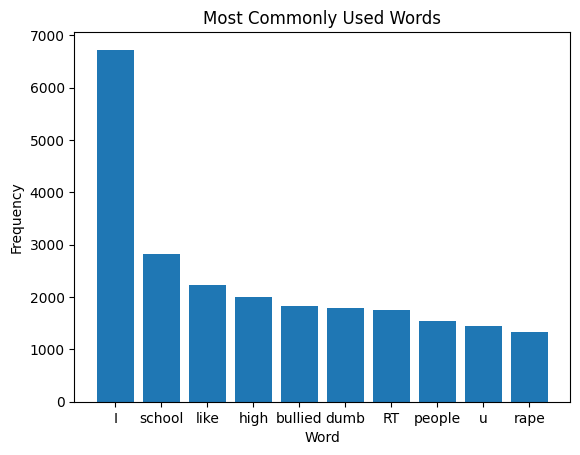

In [17]:
top_words = word_counts.most_common(10)
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

# Visualizations
---

Sentiment Analysis Plot

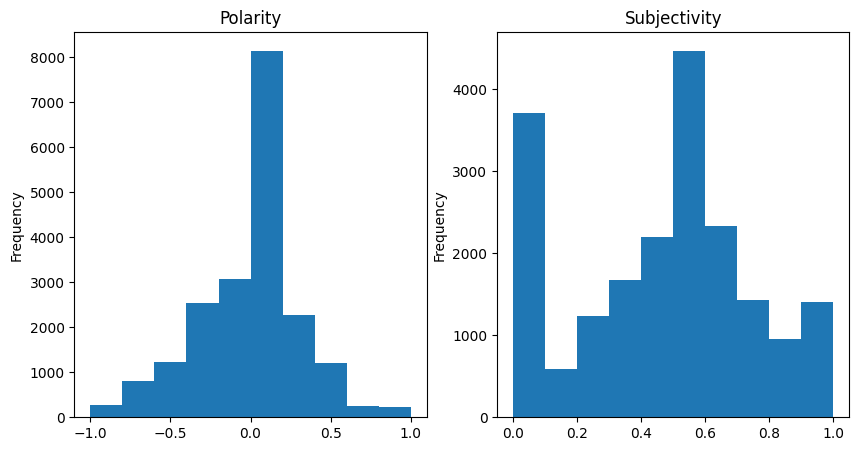

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

sentiment_scores = []
for text in df['tweet_text']:
    analysis = TextBlob(text)
    sentiment_scores.append((analysis.sentiment.polarity, analysis.sentiment.subjectivity))

# DataFrame with sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores, columns=['polarity', 'subjectivity'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sentiment_df['polarity'].plot(kind='hist', ax=axes[0], title='Polarity')
sentiment_df['subjectivity'].plot(kind='hist', ax=axes[1], title='Subjectivity')
plt.show()

# NLP

In [19]:
# Clean the data
def clean_text(text):

    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'http\S+', '', text)

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]

    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    text = ' '.join(words)
    return text

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
%%time

tqdm.pandas()

df['cleaned_text'] = df['tweet_text'].progress_apply(clean_text)

  0%|          | 0/20000 [00:00<?, ?it/s]

CPU times: user 41.2 s, sys: 5.62 s, total: 46.9 s
Wall time: 51.9 s


# Feature Extraction

In [22]:
# Create the Bag of Words model
cv = CountVectorizer()
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['cyberbullying_type']

In [23]:
# Split the training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Model

Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# train a Logistic Regression Model
clf = LogisticRegression(max_iter = 1000)

In [25]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Predictions

y_pred = clf.predict(X_test)
y_pred

array(['other_cyberbullying', 'other_cyberbullying', 'religion', ...,
       'religion', 'gender', 'age'], dtype=object)

In [27]:
# Accuracy Score

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.82325


In [28]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[648,   0,   0,  14,   9,   0],
       [  2, 612,   1,   5,   7,   1],
       [  2,   2, 588,  53,  67,   1],
       [ 13,   2,  27, 335, 221,  21],
       [  5,   2,  32, 184, 446,   3],
       [  0,   0,   3,  23,   7, 664]])

<Axes: >

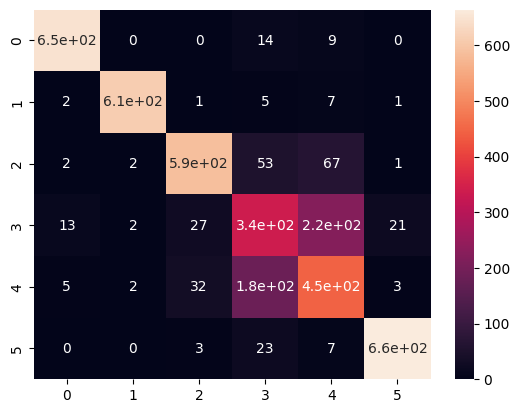

In [29]:
import seaborn as sns
sns.heatmap(cm, annot=True)

# Classification Report

In [30]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                     precision    recall  f1-score   support

                age       0.97      0.97      0.97       671
          ethnicity       0.99      0.97      0.98       628
             gender       0.90      0.82      0.86       713
  not_cyberbullying       0.55      0.54      0.54       619
other_cyberbullying       0.59      0.66      0.62       672
           religion       0.96      0.95      0.96       697

           accuracy                           0.82      4000
          macro avg       0.83      0.82      0.82      4000
       weighted avg       0.83      0.82      0.83      4000



# Function to predict cyberbullying

In [31]:
def predict_cyberbullying(text, model, vectorizer):
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text]).toarray()
    prediction = model.predict(vectorized_text)
    return prediction[0]


In [32]:
# Example

# Enter Any text to test the model
tweet_to_predict = "I hate helping others and spreading positivity"
prediction_result = predict_cyberbullying(tweet_to_predict, clf, cv)
print(tweet_to_predict)
print(prediction_result + "\n")

if prediction_result == 'not_cyberbullying':
    print("The text is not classified as cyberbullying")
else:
    print("The text is classified as cyberbullying")

I hate helping others and spreading positivity
other_cyberbullying

The text is classified as cyberbullying


In [33]:
# Example

tweet_to_predict = "I love helping others and spreading positivity"
prediction_result = predict_cyberbullying(tweet_to_predict, clf, cv)
print(tweet_to_predict)
print(prediction_result + "\n")

if prediction_result == 'not_cyberbullying':
    print("The text is not classified as cyberbullying")
else:
    print("The text is classified as cyberbullying")

I love helping others and spreading positivity
not_cyberbullying

The text is not classified as cyberbullying
